# Sentiment Classification

## Visualize data

In [ ]:
# Import core libraries
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", rc=custom_params, palette="pastel")

In [ ]:
## Load datasets
# Twitter Sentiments on India Election
# Source: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset?resource=download
# old url='https://drive.google.com/file/d/1BEFeANSJd9JVX4h5tpwf6AOSYWrCM02_/view?usp=sharing'


# url = 'https://drive.google.com/file/d/1zSJuBhGIK_kmFQXvsT7WNNXs-q50Hgxt/view?usp=sharing'
# url = 'https://drive.google.com/file/d/1bvdk300w4A3rDLevFar1J8HyOc9DY0ry/view?usp=sharing'
# url ='https://drive.google.com/file/d/10sZWk-wDHwh7H6L_j5AKaJ7BgXvrCb0W/view?usp=sharing'
url = 'https://drive.google.com/file/d/1_hdb9-zkcGwNKv17ridNyKmOJupfvvaC/view?usp=sharing' #150
# url = 'https://drive.google.com/file/d/1E4UQBW4bpu44pf_ClRVeZnbh76MRx9Ts/view?usp=sharing' # 200
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_senti = pd.read_csv(url)
df_senti = df_senti.rename(columns={'translatedTweet': 'tweet'})
df_senti = df_senti.rename(columns={'label': 'sentiment'})

df_senti.head()
print(df_senti)

                                                 tweet  sentiment
0    600 per kilo? Then don't buy 1 kilo.\nSolution...         -1
1    "This type of statement is called ""Sandrocism...         -1
2    The Peso is not weak, but the dollar  is reall...         -1
3    Is the peso strong because the dollar is weak?...         -1
4    “the peso is not weak because the peso is weak...          0
..                                                 ...        ...
145  As the peso becomes weaker not because it is w...          1
146  It's funny how ppl do hate Sandro bcos he expl...          1
147  regarding sandro's statement that "the peso is...          1
148  tbf sandro's statement re: dollar and peso rel...          1
149  Sandro Marcos is actually correct. Because of ...          1

[150 rows x 2 columns]


In [ ]:
## Plot sentiment distributions
import plotly.express as px

sentiment_labels = {-1: 'Oppose', 0: 'Neutral', 1: 'Support'}
sentiment_colors = ['#aaa187', '#bc8034', '#664e4c']
df_senti['sentiment_label'] = df_senti['sentiment'].map(sentiment_labels)

# Count the occurrences of each sentiment
sentiment_counts = df_senti['sentiment_label'].value_counts()
sentiment_counts = sentiment_counts.reindex(['Oppose', 'Neutral', 'Support'])

# Plot the distribution of sentiments
fig = px.bar(sentiment_counts, x=sentiment_counts.index, y=sentiment_counts.values,
             labels={'x': 'Sentiment', 'y': 'Count'},
             title='Twitter Sentiments Distribution')
fig.update_traces(marker_color=sentiment_colors)
fig.update_layout({
    'plot_bgcolor': 'rgb(255,255,255)',
    'paper_bgcolor': 'rgb(255,255,255)',
})
fig.show()


In [ ]:
%%capture
# Initialize NLP components
# !pip install emoji
# !pip install nltk
# !pip install pyspellchecker

import string
import nltk
import emoji

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from nltk.stem import SnowballStemmer

from nltk.stem import WordNetLemmatizer

from textblob import TextBlob

from spellchecker import SpellChecker

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
twtternizer = TweetTokenizer()

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
spell = SpellChecker()

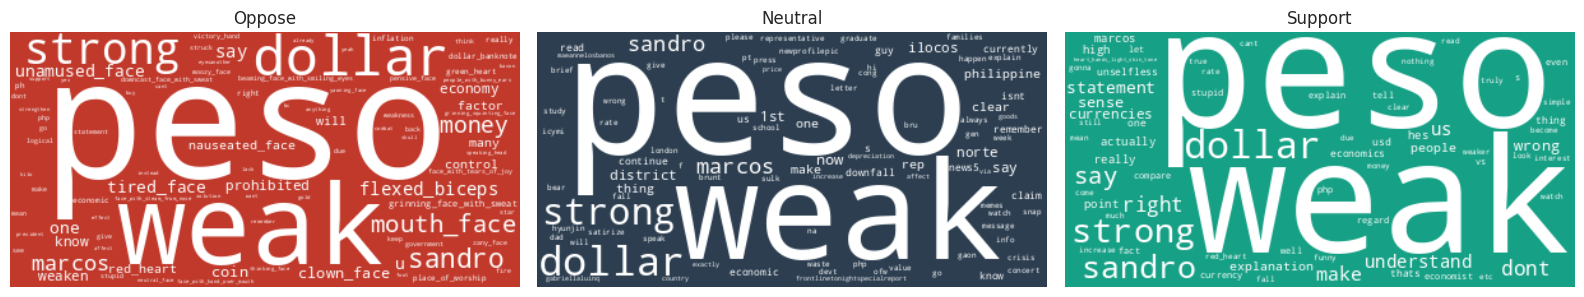

In [ ]:
from wordcloud import WordCloud, STOPWORDS


sentiment_groups = df_senti.groupby('sentiment')
sentiment_colors = ['#c0392b', '#2c3e50', '#16a085']
stopwords = set(STOPWORDS)
# stop_words = set(stopwords.words('english'))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# Generate word cloud for each sentiment
for ax, (sentiment, group), color in zip(axes, sentiment_groups, sentiment_colors):
  text = group['tweet'].str.cat(sep=' ')

  # Preprocess text
  # Tokenize Tweet
  tokens = twtternizer.tokenize(text)

  # Remove Links
  tokens = [token for token in tokens if not token.startswith('http')]

  # Remove Punctuation
  tokens = ["".join([i for i in token if i not in string.punctuation+ '’“”—']) for token in tokens]

  # Replace Emoji with Descriptions
  tokens = [emoji.demojize(token) for token in tokens]

  # Transform to Lower Cases
  tokens = [str.lower(token) for token in tokens]

  # Removed Stop Words
  tokens = [token for token in tokens if token not in stopwords]

  # Removed Empty Tokens
  tokens = [token for token in tokens if token]

  # Lemmatize
  lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]



  wordcloud = WordCloud(background_color=color,
                        color_func=lambda *args, **kwargs: 'white',
                        prefer_horizontal=1.0,
                        collocations=False).generate(' '.join(lemmatized_tokens))

  ax.imshow(wordcloud, interpolation='bilinear')
  ax.set_title(f'{sentiment_labels[sentiment]}')
  ax.axis('off')

plt.tight_layout()
plt.show()

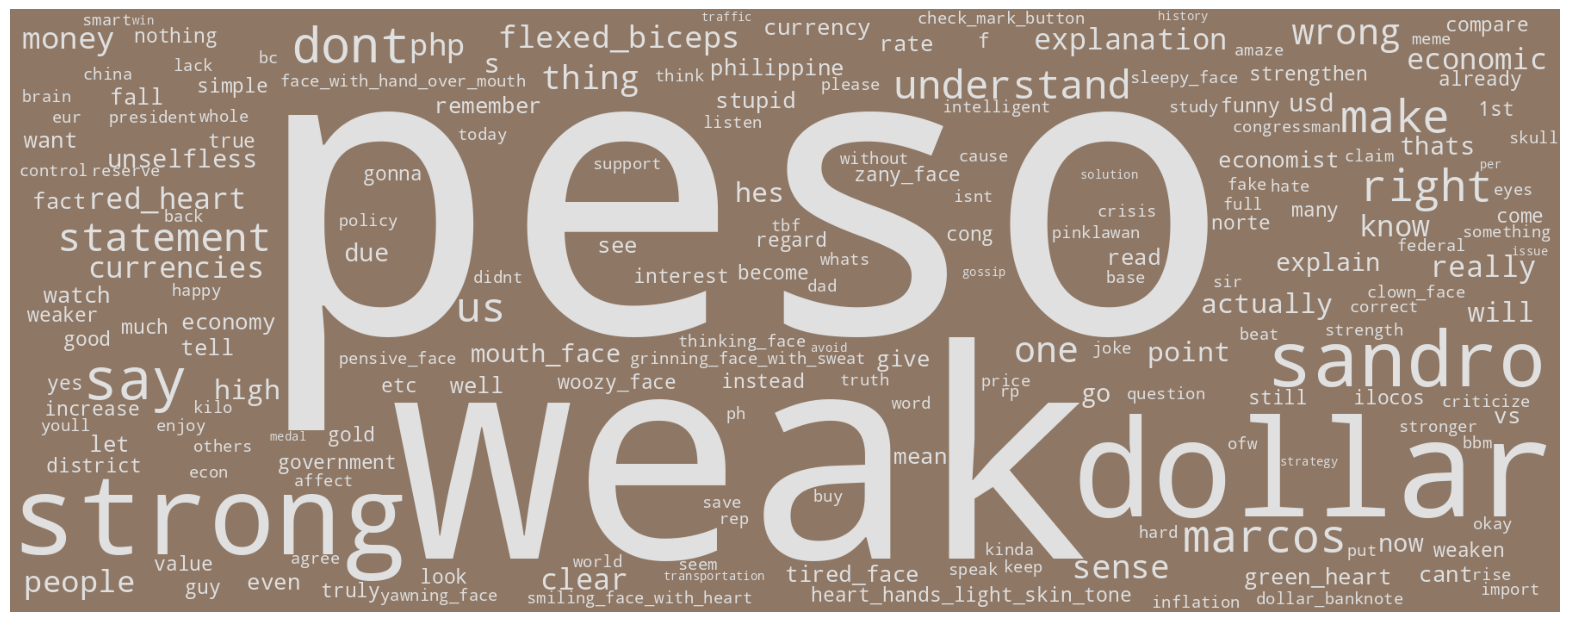

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

text = df_senti['tweet'].str.cat(sep=' ')

# Preprocess text
# Tokenize Tweet
tokens = twtternizer.tokenize(text)

# Remove Links
tokens = [token for token in tokens if not token.startswith('http')]

# Remove Punctuation
tokens = ["".join([i for i in token if i not in string.punctuation+ '’“”—']) for token in tokens]

# Replace Emoji with Descriptions
tokens = [emoji.demojize(token) for token in tokens]

# Transform to Lower Cases
tokens = [str.lower(token) for token in tokens]

# Removed Stop Words
tokens = [token for token in tokens if token not in stopwords]

# Removed Empty Tokens
tokens = [token for token in tokens if token]

# Lemmatize
lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]

# Generate word cloud
wordcloud = WordCloud(background_color='#8E7765',
                      width=1800, height=700,
                      color_func=lambda *args, **kwargs: '#E0E0E0',
                      prefer_horizontal=1.0,
                      collocations=False).generate(' '.join(lemmatized_tokens))

# Display the word cloud
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='antialiased')
plt.axis('off')

# plt.tight_layout()
plt.show()

## Perform classification

In [ ]:
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare datasets
df_senti = df_senti.dropna()
X = df_senti['tweet']
y = df_senti['sentiment']



# Split by undersampling
# class_counts = df_senti['sentiment'].value_counts()
# target_count = int(class_counts.min() * 0.8)

# train_df = pd.DataFrame()
# test_df = pd.DataFrame()

# for sentiment_class in class_counts.index:
#   class_samples = df_senti[df_senti['sentiment'] == sentiment_class]

#   # Resample each sentiment to have equal samples
#   resampled_class = resample(class_samples, replace=False, n_samples=target_count, random_state=42)
#   train_df = pd.concat([train_df, resampled_class])

#   unchosen_class = class_samples.drop(resampled_class.index)
#   test_df = pd.concat([test_df, unchosen_class])

# X_train, y_train = train_df['tweet'], train_df['sentiment']
# X_test, y_test = test_df['tweet'], test_df['sentiment']

# Define NLP preprocessing steps
def custom_tokenizer(text):
  # Preprocess text
  # Tokenize Tweet
  tokens = twtternizer.tokenize(text)

  # Remove Links
  tokens = [token for token in tokens if not token.startswith('http')]

  # Remove Punctuation
  tokens = ["".join([i for i in token if i not in string.punctuation+ '’“”—']) for token in tokens]

  # Replace Emoji with Descriptions
  tokens = [emoji.demojize(token) for token in tokens]

  # Transform to Lower Cases
  tokens = [str.lower(token) for token in tokens]

  # Removed Stop Words
  tokens = [token for token in tokens if token not in stopwords]

  # Removed Empty Tokens
  tokens = [token for token in tokens if token]

  # Lemmatize
  lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]

  return tokens

# Split training and test with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=91)
# Convert text into numerical features
# vectorizer = CountVectorizer(tokenizer=custom_tokenizer) # Bag-of-words
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1,1), token_pattern=None)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = SVC(kernel='poly', degree=2, gamma=2)
# classifier = MultinomialNB()
# classifier = SVC(kernel='poly', degree=2, gamma=2)
classifier.fit(X_train_vec, y_train)


# Predict the sentiment labels for the test set
y_pred = classifier.predict(X_test_vec)



# Print precision, recall, accuracy, fscore on test data
print('Model Evaluation')
print('Training samples:', len(y_train))
print('Test samples:', len(y_test), '\n')
print(classification_report(y_test, y_pred))

Model Evaluation
Training samples: 172
Test samples: 31 

              precision    recall  f1-score   support

          -1       0.83      0.91      0.87        11
           0       0.90      1.00      0.95         9
           1       0.89      0.73      0.80        11

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.87      0.87      0.87        31



## Test the model

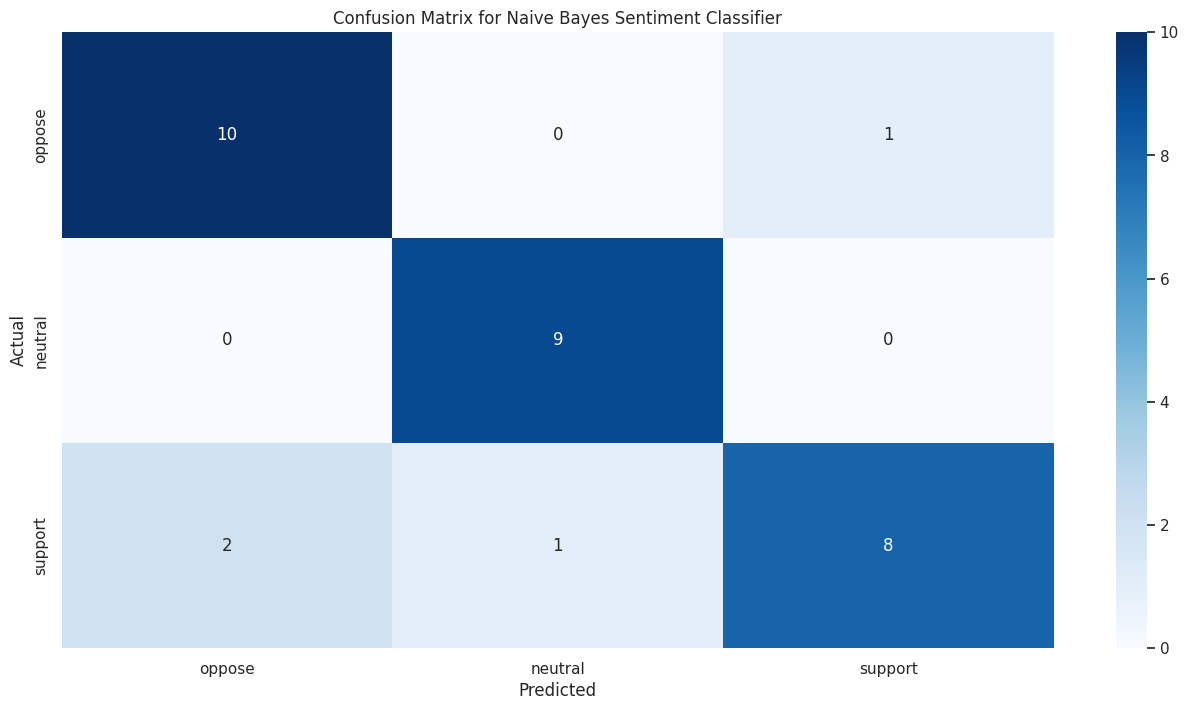

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['oppose', 'neutral', 'support']
plt.figure(figsize=(16, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Sentiment Classifier')
plt.show()

In [ ]:
# Classify a random tweet from the dataset

correct = 0
wrong =0
for ind in df_senti.index:
    random_tweet = df_senti['tweet'][ind]
    predicted_sentiment = classifier.predict(vectorizer.transform([random_tweet]))
    correct_sentiment = df_senti['sentiment'][ind]

    # Print the predicted and correct sentiments
    if sentiment_labels[predicted_sentiment[0]] == sentiment_labels[correct_sentiment]:
      correct=correct+1
    else:
      wrong=wrong+1
print('correct',correct)
print('wrong',wrong)

correct 183
wrong 20
